# Speech Emotion Recognition With Convolutional Neural Network

<a id="1"></a>
# Including Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import IPython
import tensorflow.keras.layers as L
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
import re
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<a id="2"></a>
# Including the Datasets

In [2]:
Crema_Path = '../input/speech-emotion-recognition-en/Crema/'
Ravdess_Path = '../input/speech-emotion-recognition-en/Ravdess/audio_speech_actors_01-24'
Savee_Path = '../input/speech-emotion-recognition-en/Savee/'
Tess_Path = '../input/speech-emotion-recognition-en/Tess/'

<a id="3"></a>
# Data Analyze

In [3]:
crema = []
for wav in os.listdir(Crema_Path):
    emotion = wav.partition(".wav")[0].split('_')
    if emotion[2] == 'SAD':
        crema.append(('sad',Crema_Path + '/' + wav))
    elif emotion[2] == 'ANG':
        crema.append(('angry',Crema_Path + '/' + wav))
    elif emotion[2] == 'DIS':
        crema.append(('disgust',Crema_Path + '/' + wav))
    elif emotion[2] == 'FEA':
        crema.append(('fear',Crema_Path + '/' + wav))
    elif emotion[2] == 'HAP':
        crema.append(('happy',Crema_Path + '/' + wav))
    elif emotion[2] == 'NEU':
        crema.append(('neutral',Crema_Path + '/' + wav))
    else:
        crema.append(('unknown',Crema_Path + '/' + wav))
Crema_df = pd.DataFrame.from_dict(crema)
Crema_df.rename(columns = {0:'Emotion', 1:'File_Path'},inplace = True)
Crema_df.head()

,Emotion,File_Path
0,disgust,../input/speech-emotion-recognition-en/Crema//...
1,happy,../input/speech-emotion-recognition-en/Crema//...
2,happy,../input/speech-emotion-recognition-en/Crema//...
3,disgust,../input/speech-emotion-recognition-en/Crema//...
4,disgust,../input/speech-emotion-recognition-en/Crema//...


In [4]:
Crema_df['Emotion'].unique()

array(['disgust', 'happy', 'sad', 'neutral', 'fear', 'angry'],
      dtype=object)

In [5]:
ravdess = []
for directory in os.listdir(Ravdess_Path):
    actors = os.listdir(os.path.join(Ravdess_Path, directory))
    for wav in actors:
        emotion = wav.partition('.wav')[0].split('-')
        emotion_number = int(emotion[2])
        ravdess.append((emotion_number,os.path.join(Ravdess_Path,directory,wav)))
Ravdess_df=pd.DataFrame.from_dict(ravdess)
Ravdess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Ravdess_df['Emotion'].replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'},inplace=True)
Ravdess_df.head()

,Emotion,File_Path
0,surprise,../input/speech-emotion-recognition-en/Ravdess...
1,neutral,../input/speech-emotion-recognition-en/Ravdess...
2,disgust,../input/speech-emotion-recognition-en/Ravdess...
3,disgust,../input/speech-emotion-recognition-en/Ravdess...
4,neutral,../input/speech-emotion-recognition-en/Ravdess...


In [6]:
Ravdess_df['Emotion'].unique()

array(['surprise', 'neutral', 'disgust', 'fear', 'sad', 'happy', 'angry'],
      dtype=object)

In [7]:
savee=[]
for wav in os.listdir(Savee_Path):
    emo=wav.partition('.wav')[0].split('_')[1].replace(r'[0-9]','')
    emotion=re.split(r'[0-9]',emo)[0]
    if emotion=='a':
        savee.append(('angry',Savee_Path+'/'+wav))
    elif emotion=='d':
        savee.append(('disgust',Savee_Path+'/'+wav))
    elif emotion=='f':
        savee.append(('fear',Savee_Path+'/'+wav))
    elif emotion=='h':
        savee.append(('happy',Savee_Path+'/'+wav))
    elif emotion=='n':
        savee.append(('neutral',Savee_Path+'/'+wav))
    elif emotion=='sa':
        savee.append(('sad',Savee_Path+'/'+wav))
    elif emotion=='su':
        savee.append(('surprise',Savee_Path+'/'+wav))
Savee_df=pd.DataFrame.from_dict(savee)
Savee_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Savee_df.head()

,Emotion,File_Path
0,happy,../input/speech-emotion-recognition-en/Savee//...
1,fear,../input/speech-emotion-recognition-en/Savee//...
2,happy,../input/speech-emotion-recognition-en/Savee//...
3,disgust,../input/speech-emotion-recognition-en/Savee//...
4,angry,../input/speech-emotion-recognition-en/Savee//...


In [8]:
Savee_df['Emotion'].unique()

array(['happy', 'fear', 'disgust', 'angry', 'surprise', 'neutral', 'sad'],
      dtype=object)

In [9]:
tess=[]
for directory in os.listdir(Tess_Path):
    for wav in os.listdir(os.path.join(Tess_Path,directory)):
        emotion=wav.partition('.wav')[0].split('_')
        if emotion[2]=='ps':
            tess.append(('surprise',os.path.join(Tess_Path,directory,wav)))
        else:
            tess.append((emotion[2],os.path.join(Tess_Path,directory,wav)))
Tess_df=pd.DataFrame.from_dict(tess)
Tess_df.rename(columns={0:'Emotion',1:'File_Path'},inplace=True)
Tess_df.head()

,Emotion,File_Path
0,fear,../input/speech-emotion-recognition-en/Tess/YA...
1,fear,../input/speech-emotion-recognition-en/Tess/YA...
2,fear,../input/speech-emotion-recognition-en/Tess/YA...
3,fear,../input/speech-emotion-recognition-en/Tess/YA...
4,fear,../input/speech-emotion-recognition-en/Tess/YA...


In [10]:
Tess_df['Emotion'].unique()

array(['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy'],
      dtype=object)

In [11]:
main_df=pd.concat([Crema_df,Ravdess_df,Savee_df,Tess_df],axis=0)
main_df.shape

(12162, 2)

In [12]:
main_df.head(15)

,Emotion,File_Path
0,disgust,../input/speech-emotion-recognition-en/Crema//...
1,happy,../input/speech-emotion-recognition-en/Crema//...
2,happy,../input/speech-emotion-recognition-en/Crema//...
3,disgust,../input/speech-emotion-recognition-en/Crema//...
4,disgust,../input/speech-emotion-recognition-en/Crema//...
5,disgust,../input/speech-emotion-recognition-en/Crema//...
6,happy,../input/speech-emotion-recognition-en/Crema//...
7,sad,../input/speech-emotion-recognition-en/Crema//...
8,disgust,../input/speech-emotion-recognition-en/Crema//...
9,sad,../input/speech-emotion-recognition-en/Crema//...


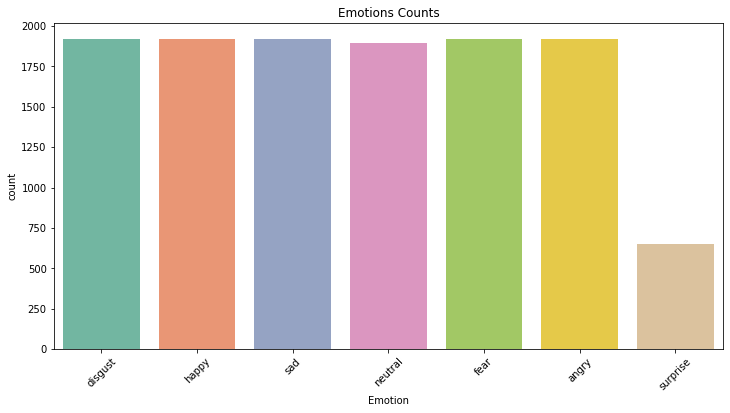

In [13]:
plt.figure(figsize=(12,6))
plt.title('Emotions Counts')
emotions=sns.countplot(x='Emotion',data=main_df,palette='Set2')
emotions.set_xticklabels(emotions.get_xticklabels(),rotation=45)
plt.show()

In [14]:
emotion_names=main_df['Emotion'].unique()

In [15]:
colors={'disgust':'#804E2D','happy':'#F19C0E','sad':'#478FB8','neutral':'#4CB847','fear':'#7D55AA','angry':'#C00808','surprise':'#EE00FF'}

In [16]:
def wave_plot(data,sr,emotion,color):
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for waveplot',size=17)
    librosa.display.waveshow(y=data,sr=sr,color=color)

In [17]:
def spectogram(data,sr,emotion):
    audio=librosa.stft(data)
    audio_db=librosa.amplitude_to_db(abs(audio))
    plt.figure(figsize=(12,5))
    plt.title(f'{emotion} emotion for spectogram',size=17)
    librosa.display.specshow(audio_db,sr=sr,x_axis='time',y_axis='hz')

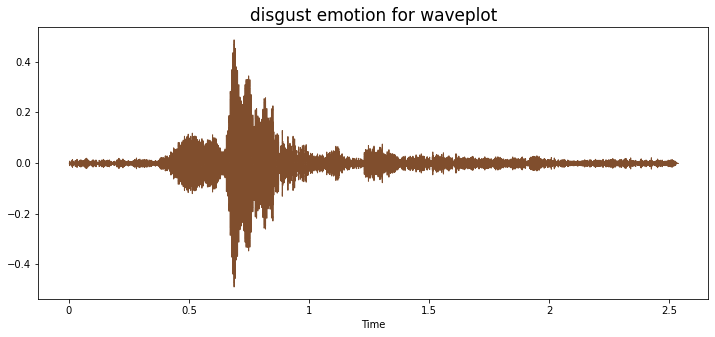

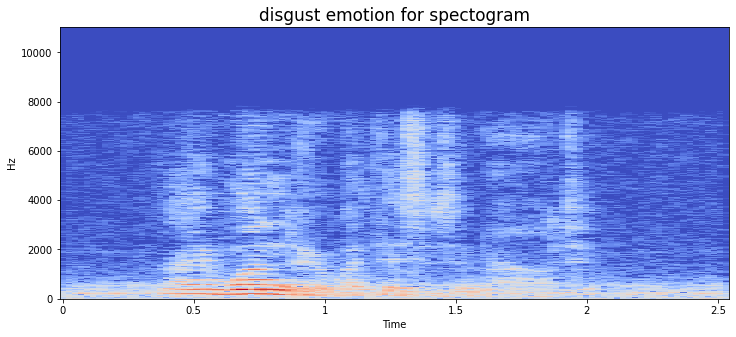

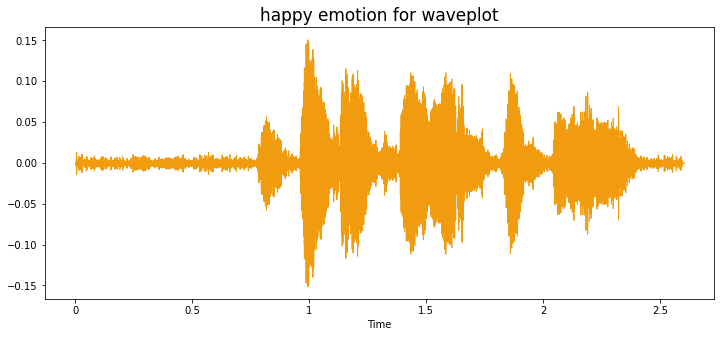

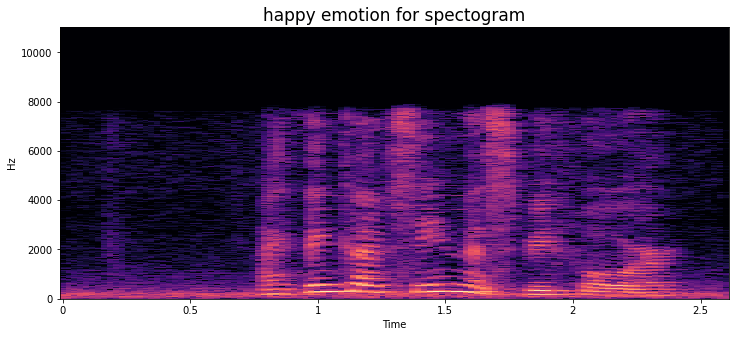

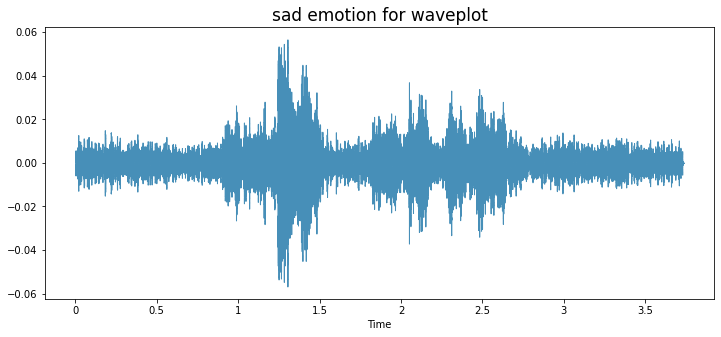

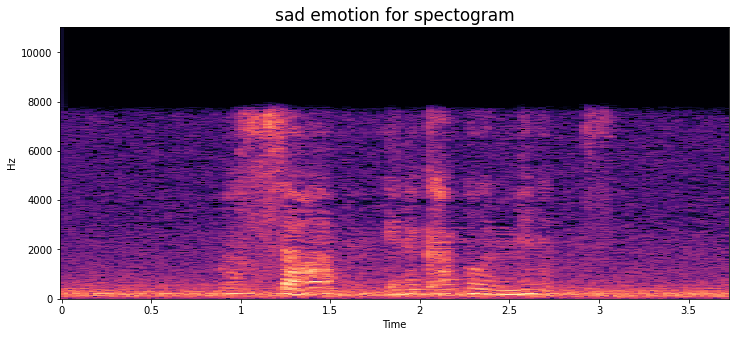

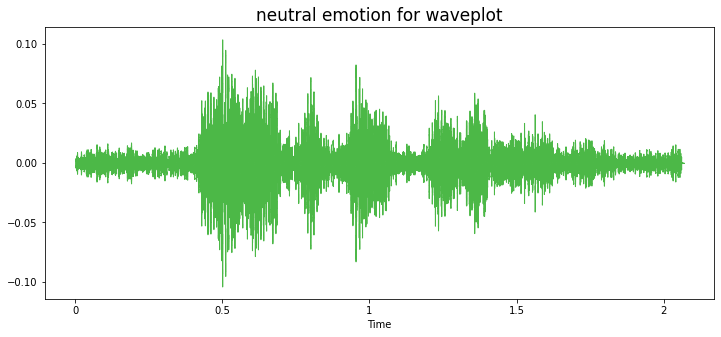

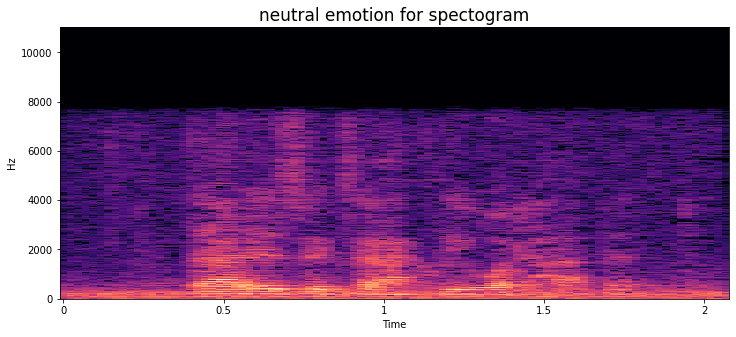

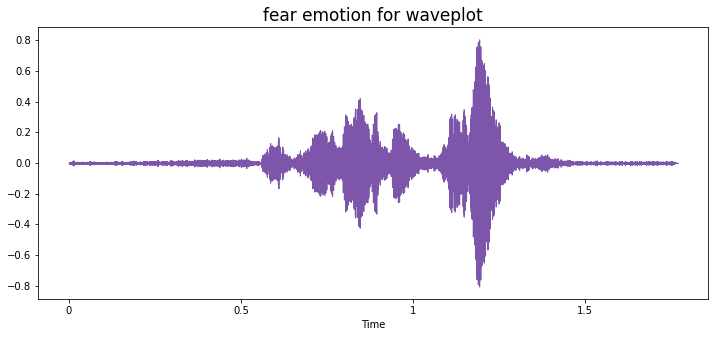

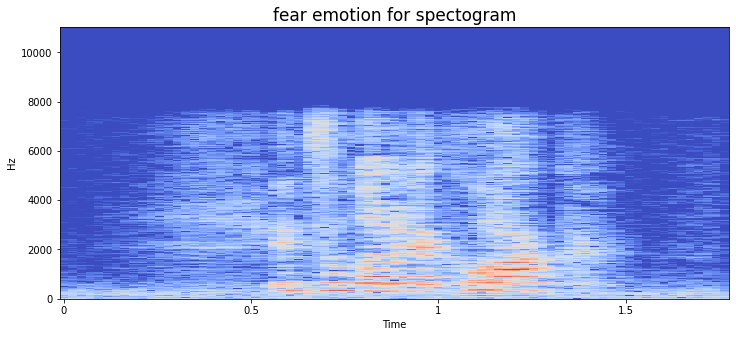

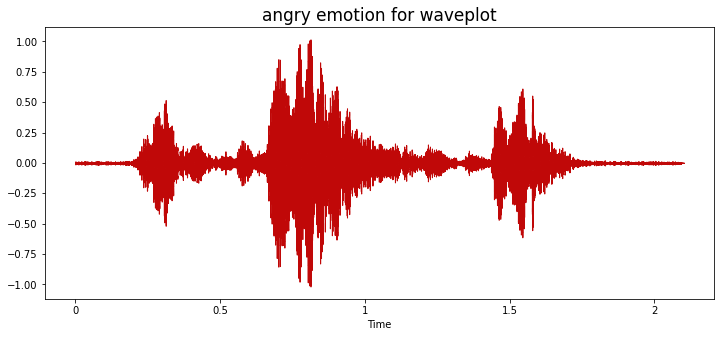

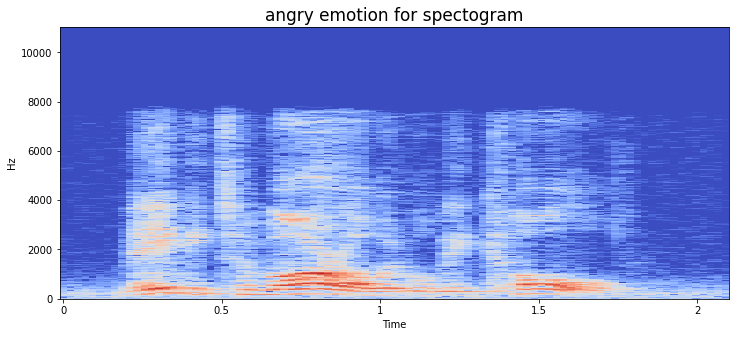

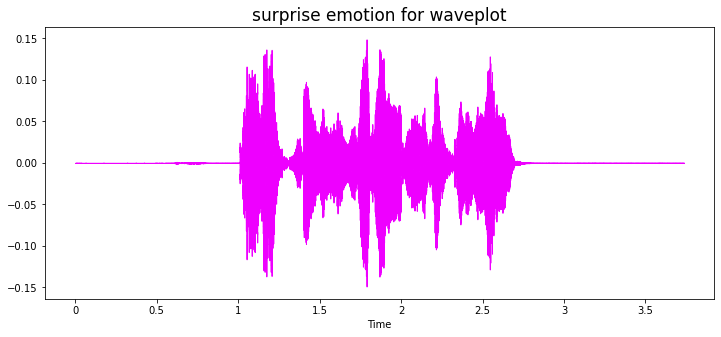

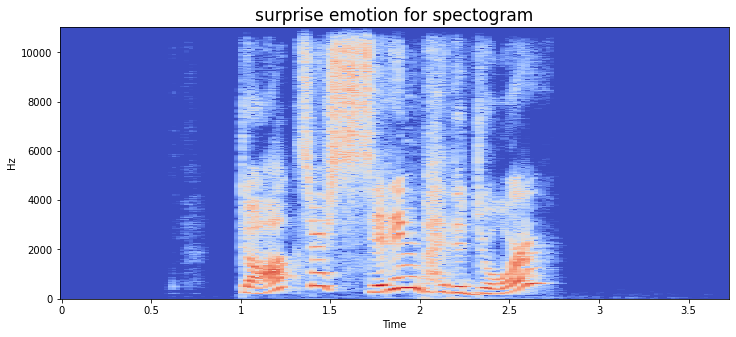

In [18]:
audio_path=[]
for emotion in emotion_names:
    path=np.array(main_df['File_Path'][main_df['Emotion']==emotion])[1]
    data,sr=librosa.load(path)
    wave_plot(data,sr,emotion,colors[emotion])
    spectogram(data,sr,emotion)
    audio_path.append(path)

<a id="7"></a>
## Audio Augmentation

In [19]:
data,sr=librosa.load(audio_path[6])

<a id="13"></a>
## Feature Extraction

In [20]:
def zcr(data,frame_length=2048,hop_length=512):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result



In [21]:
X,Y=[],[]
for path,emotion,index in zip(main_df.File_Path,main_df.Emotion,range(main_df.File_Path.shape[0])):
    data,sr=librosa.load(path,duration=2.5,offset=0.6)
    aud=extract_features(data,sr)
#     print(features)
    if index%500==0:
        print(f'{index} audio has been processed')
#     for i in aud:
    X.append(aud)
    Y.append(emotion)
print('Done')

0 audio has been processed
500 audio has been processed
1000 audio has been processed
1500 audio has been processed
2000 audio has been processed
2500 audio has been processed
3000 audio has been processed
3500 audio has been processed
4000 audio has been processed
4500 audio has been processed
5000 audio has been processed
5500 audio has been processed
6000 audio has been processed
6500 audio has been processed
7000 audio has been processed
7500 audio has been processed
8000 audio has been processed
8500 audio has been processed
9000 audio has been processed
9500 audio has been processed
10000 audio has been processed
10500 audio has been processed
11000 audio has been processed
11500 audio has been processed
12000 audio has been processed
Done


<a id="14"></a>
## Processing

In [22]:
processed_data_path='./processed_data.csv'

In [23]:
extract=pd.DataFrame(X)
extract['Emotion']=Y
extract.to_csv(processed_data_path,index=False)
extract.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.121094,0.187012,0.234863,0.244629,0.244629,0.239746,0.231445,0.178711,0.123535,0.073730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
1,0.016113,0.021484,0.029297,0.030762,0.033691,0.036133,0.038574,0.046875,0.054688,0.062500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
2,0.013184,0.020020,0.026855,0.028809,0.026855,0.031250,0.036133,0.040527,0.050293,0.054199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
3,0.016113,0.024902,0.033203,0.034668,0.042480,0.043457,0.042480,0.040039,0.030762,0.028809,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
4,0.021484,0.030273,0.037598,0.031738,0.030762,0.044922,0.083984,0.139648,0.189941,0.180176,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
5,0.018555,0.026367,0.037109,0.029297,0.031738,0.030762,0.034180,0.033691,0.033203,0.031738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
6,0.239258,0.350098,0.430176,0.324707,0.214844,0.112305,0.040039,0.036621,0.048828,0.055664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,happy
7,0.020020,0.027832,0.048828,0.063965,0.071289,0.072754,0.059570,0.042969,0.032715,0.033203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sad
8,0.021973,0.033203,0.041992,0.046387,0.077637,0.097168,0.113281,0.109375,0.074219,0.056152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
9,0.013672,0.024414,0.042480,0.043945,0.044434,0.042480,0.040527,0.039551,0.041992,0.040039,...,-3.691932,-3.442045,-21.101757,1.337013,-12.909756,13.46137,-13.956509,-5.27072,-9.945074,sad


<a id="15"></a>
# Including Analyzed Audio Features

In [24]:
df=pd.read_csv(processed_data_path)
df.shape

(12162, 2377)

In [25]:
df=df.fillna(0)
print(df.isna().any())
df.shape

0          False
1          False
2          False
3          False
4          False
           ...  
2372       False
2373       False
2374       False
2375       False
Emotion    False
Length: 2377, dtype: bool


(12162, 2377)

In [26]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.121094,0.187012,0.234863,0.244629,0.244629,0.239746,0.231445,0.178711,0.123535,0.073730,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,disgust
1,0.016113,0.021484,0.029297,0.030762,0.033691,0.036133,0.038574,0.046875,0.054688,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,happy
2,0.013184,0.020020,0.026855,0.028809,0.026855,0.031250,0.036133,0.040527,0.050293,0.054199,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,happy
3,0.016113,0.024902,0.033203,0.034668,0.042480,0.043457,0.042480,0.040039,0.030762,0.028809,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,disgust
4,0.021484,0.030273,0.037598,0.031738,0.030762,0.044922,0.083984,0.139648,0.189941,0.180176,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,disgust
5,0.018555,0.026367,0.037109,0.029297,0.031738,0.030762,0.034180,0.033691,0.033203,0.031738,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,disgust
6,0.239258,0.350098,0.430176,0.324707,0.214844,0.112305,0.040039,0.036621,0.048828,0.055664,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,happy
7,0.020020,0.027832,0.048828,0.063965,0.071289,0.072754,0.059570,0.042969,0.032715,0.033203,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,sad
8,0.021973,0.033203,0.041992,0.046387,0.077637,0.097168,0.113281,0.109375,0.074219,0.056152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,disgust
9,0.013672,0.024414,0.042480,0.043945,0.044434,0.042480,0.040527,0.039551,0.041992,0.040039,...,-3.691932,-3.442045,-21.101757,1.337013,-12.909756,13.46137,-13.956509,-5.27072,-9.945074,sad


<a id="16"></a>
# Processing Analyzed Data for Training

In [27]:
X=df.drop(labels='Emotion',axis=1)
Y=df['Emotion']

In [28]:
lb=LabelEncoder()
Y=np_utils.to_categorical(lb.fit_transform(Y))
print(lb.classes_)
Y

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<a id="17"></a>
## Train, Test and Validation Spliting

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.2,shuffle=True)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9729, 2376), (2433, 2376), (9729, 7), (2433, 7))

In [30]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,random_state=42,test_size=0.1,shuffle=True)
X_train.shape, X_test.shape, X_val.shape, y_train.shape,y_test.shape,y_val.shape

((8756, 2376), (2433, 2376), (973, 2376), (8756, 7), (2433, 7), (973, 7))

In [31]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_val=scaler.transform(X_val)
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((8756, 2376), (2433, 2376), (973, 2376), (8756, 7), (2433, 7), (973, 7))

In [32]:
X_train=np.expand_dims(X_train,axis=2)
X_val=np.expand_dims(X_val,axis=2)
X_test=np.expand_dims(X_test,axis=2)
X_train.shape, X_test.shape, X_val.shape

((8756, 2376, 1), (2433, 2376, 1), (973, 2376, 1))

<a id="18"></a>
## Tuning for Training

In [33]:
early_stop=EarlyStopping(monitor='val_acc',mode='auto',patience=5,restore_best_weights=True)
lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

In [34]:
EPOCH=500
BATCH_SIZE=64

<a id="19"></a>
# Begin Training

In [35]:
model=tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 2376, 512)         3072      
_________________________________________________________________
batch_normalization (BatchNo (None, 2376, 512)         2048      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 1188, 512)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1188, 512)         1311232   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1188, 512)         2048      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 594, 512)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 594, 256)          6

In [36]:
history=model.fit(X_train, y_train, epochs=EPOCH, validation_data=(X_val,y_val), batch_size=BATCH_SIZE,callbacks=[early_stop,lr_reduction])

Epoch 1/500
137/137 [==============================] - 32s 172ms/step - loss: 1.6909 - accuracy: 0.4057 - val_loss: 5.1680 - val_accuracy: 0.1398
Epoch 2/500
137/137 [==============================] - 23s 167ms/step - loss: 1.3066 - accuracy: 0.4989 - val_loss: 4.6838 - val_accuracy: 0.1511
Epoch 3/500
137/137 [==============================] - 23s 167ms/step - loss: 1.1736 - accuracy: 0.5469 - val_loss: 2.9770 - val_accuracy: 0.2035
Epoch 4/500
137/137 [==============================] - 23s 167ms/step - loss: 1.0989 - accuracy: 0.5731 - val_loss: 1.7019 - val_accuracy: 0.3700
Epoch 5/500
137/137 [==============================] - 23s 167ms/step - loss: 1.0238 - accuracy: 0.6095 - val_loss: 1.1619 - val_accuracy: 0.5632
Epoch 6/500
137/137 [==============================] - 23s 167ms/step - loss: 0.9658 - accuracy: 0.6283 - val_loss: 1.3216 - val_accuracy: 0.5067
Epoch 7/500
137/137 [==============================] - 23s 167ms/step - loss: 0.9061 - accuracy: 0.6520 - val_loss: 1.5518 -

<a id="20"></a>
# Drawing Charts

<a id="21"></a>
## Accuracy Charts

In [37]:
fig=px.line(history.history,y=['accuracy','val_accuracy'],
           labels={'index':'epoch','value':'accuracy'},
           title=f'According to the epoch accuracy and validation accuracy chart for the model')
fig.show()

<a id="22"></a>
## Loss Charts

In [38]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'index':'epoch','value':'loss'},
           title=f'According to the epoch loss and validation loss chart for the model')
fig.show()

<a id="24"></a>
# Testing Model and Test Results

In [39]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([2, 3, 2, ..., 3, 1, 4])

In [40]:
y_check=np.argmax(y_test,axis=1)
y_check

array([6, 4, 2, ..., 0, 1, 1])

In [41]:
loss,accuracy=model.evaluate(X_test,y_test,verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 5.032014846801758
Test Accuracy: 0.5536375045776367


<a id="25"></a>
## Confusion Matrix

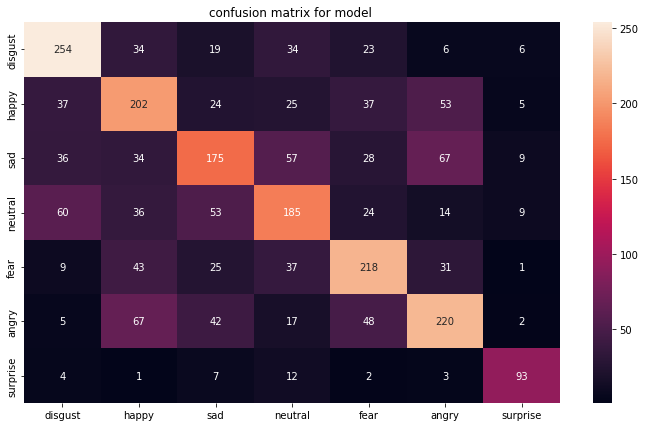

In [42]:
conf=confusion_matrix(y_check,y_pred)
cm=pd.DataFrame(
    conf,index=[i for i in emotion_names],
    columns=[i for i in emotion_names]
)
plt.figure(figsize=(12,7))
ax=sns.heatmap(cm,annot=True,fmt='d')
ax.set_title(f'confusion matrix for model ')
plt.show()

In [43]:
print(f'Model Confusion Matrix\n',classification_report(y_check,y_pred,target_names=emotion_names))

Model Confusion Matrix
               precision    recall  f1-score   support

     disgust       0.63      0.68      0.65       376
       happy       0.48      0.53      0.51       383
         sad       0.51      0.43      0.47       406
     neutral       0.50      0.49      0.49       381
        fear       0.57      0.60      0.59       364
       angry       0.56      0.55      0.55       401
    surprise       0.74      0.76      0.75       122

    accuracy                           0.55      2433
   macro avg       0.57      0.58      0.57      2433
weighted avg       0.55      0.55      0.55      2433



In [44]:
# model_path = "./res_model.h5"

# model.save(model_path)